#**DEEP LEARNING - MIGUEL MARINES**
##**<u>Convolutional Neural Networks</u>**
---
---

#### Implementation of Transfer Learning for CIFAR10 Dataset with PyTorch

### **Environment**

In [ ]:
# Google Drive in Google Colab.
# Access to files and directories stored in Google Drive from a Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import numpy as np                       # Library for operations with arrays and mathematical functions.

import torch                             # Main PyTorch library for creating and working with tensors.
import torch.nn as nn                    # PyTorch module for building neural networks.
import torch.nn.functional as F          # Provides functions for common operations (like activation functions).

from torch.utils.data import DataLoader  # For loading data in batches.
from torch.utils.data import sampler     # For sampling from datasets.

import torchvision.datasets as datasets  # Datasets for computer vision tasks (e.g., CIFAR-10, MNIST).

import torchvision.transforms as T       # Transformations to apply to images (e.g., normalization).

from torchvision import models           # Pre-trained models for transfer learning.

import matplotlib.pyplot as plt          # Library for data visualization and plotting.

### **Download Cifar10 Dataset - Training, Validation and Test Data Split**

**CIFAR-10 Dataset Processing for Image Classification**

This script loads and preprocesses the CIFAR-10 dataset for image classification using PyTorch. It applies transformations to the data to match the input format of a model pretrained on the ImageNet dataset, such as resizing, normalizing, and converting the images into tensors. It also prepares the dataset for training, validation, and testing.

**Parameters:**
- `DATA_PATH`: The file path to the CIFAR-10 dataset.
- `NUM_TRAIN`: Number of samples allocated for training (default: 45,000).
- `MINIBATCH_SIZE`: Size of mini-batches used during data loading (default: 64).
- `transform_imagenet`: The transformation pipeline that resizes images to 224x224 and applies ImageNet normalization.
- `transform_cifar`: The transformation pipeline that normalizes images using CIFAR-10 statistics.

**Process:**
1. Define the path to the CIFAR-10 dataset.
2. Set the number of training samples and the mini-batch size.
3. Define two transformation pipelines:
   - One for ImageNet-pretrained models (resize, tensor conversion, and normalization).
   - One using CIFAR-10 statistics (tensor conversion and normalization).
4. Load the CIFAR-10 dataset with transformations:
   - Use ImageNet transformations for all training, validation, and test data.
   - Load data into PyTorch `DataLoader` objects for easy access in mini-batches.
5. Use random samplers to split the dataset into training, validation, and test sets:
   - Training data: 45,000 samples.
   - Validation data: The remaining 5,000 samples.
   - Test data: Separate CIFAR-10 test set.
6. Validation Loop:
   - A loop is provided to iterate through the validation set and print the batch index, shape of the input data (images), and shape of the labels. This helps ensure that the data is being correctly processed before model evaluation.


---
**Justification:**
This script ensures the CIFAR-10 dataset is correctly preprocessed for training a model that is pretrained on ImageNet. The transformations are key to adapting the CIFAR-10 dataset to the expected input format of these models. The split between training, validation, and test sets allows for unbiased model evaluation, while the `DataLoader` objects provide efficient batch processing for training and evaluation.


In [ ]:
# Path to the CIFAR-10 dataset.
DATA_PATH = '/content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py'

NUM_TRAIN = 45000            # Number of samples used for training.
MINIBATCH_SIZE = 64          # Size of each mini-batch for training.

# Transformation pipeline for the ImageNet-pretrained model (resize, convert to tensor, and normalize).
transform_imagenet = T.Compose([
    T.Resize(224),                                               # Resize images to 224x224 (required for pretrained models like ResNet).
    T.ToTensor(),                                                # Convert images to PyTorch tensors.
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))    # Normalize using ImageNet statistics.
])

# Transformation pipeline for CIFAR-10 dataset (convert to tensor and normalize).
transform_cifar = T.Compose([
    T.ToTensor(),                                                # Convert images to PyTorch tensors.
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])    # Normalize using CIFAR-10 dataset statistics.
])

# Training set loader for CIFAR-10 using ImageNet transformations.
# Load training data.
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_imagenet)
# DataLoader with random sampling.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader for CIFAR-10 using ImageNet transformations.
# Load validation data.
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_imagenet)
# DataLoader for validation.
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Test set loader for CIFAR-10 using ImageNet transformations.
 # Load test data.
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_imagenet)
# DataLoader for testing.
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Loop through the validation set loader.
for i, (x, y) in enumerate(val_loader):
    # Print the batch index (i), the shape of the input data (x), and the shape of the labels (y).
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### **Selecting Device: GPU or CPU**

In this section, the code determines whether to use a GPU (if available) or default to the CPU for computations. This is crucial for optimizing the speed of training and inference, especially when dealing with deep learning models.

- **`torch.cuda.is_available()`**: This function checks the system for an available CUDA-enabled GPU. If found, it sets the device to GPU, allowing for faster operations compared to the CPU.
- **`torch.device('cuda')`**: This specifies that computations will be performed on the GPU.
- **`torch.device('cpu')`**: If no GPU is detected, the computation defaults to the CPU.
- The selected device (CPU or GPU) is printed to confirm which hardware is being used for the model training and evaluation.


In [ ]:
# Check if a GPU (CUDA) is available, otherwise use CPU.
if torch.cuda.is_available():
    device = torch.device('cuda')   # Set device to GPU.
else:
    device = torch.device('cpu')    # Set device to CPU.

print(device)   # Print the selected device (CPU or GPU).

cuda


### **Plotting an Image Sample**

This section describes the process of visualizing a randomly selected image from the test dataset. This is helpful for inspecting the images and verifying their associated labels.

- **`plot_figure(image)`**: A function that takes a tensor image as input, rearranges its dimensions to match the format expected by `matplotlib` (channels-last), and displays the image without axis labels or ticks.
- **Class Labels**: A list of labels corresponding to the classes in the CIFAR-10 dataset (e.g., 'Plane', 'Car', 'Bird', etc.). These labels are used to interpret the predictions of the model.
- **Random Sample Selection**: A random index is selected from the test dataset, and the corresponding image and label are retrieved.
- **Normalization for Display**: The selected image is normalized by rescaling its pixel values to the [0, 1] range. This ensures the image can be properly visualized by a plotting tool like `matplotlib`.
- **Display the Image**: The normalized image is plotted, allowing for a visual inspection of the sample, along with its predicted or actual class label.

In [ ]:
# Function to plot a given image.
def plot_figure(image):
    plt.imshow(image.permute(1, 2, 0))    # Rearrange the dimensions of the image (channels last) for display.
    plt.axis('off')                       # Remove axis labels and ticks.
    plt.show()                            # Display the image.

The image shown represents a: Ship


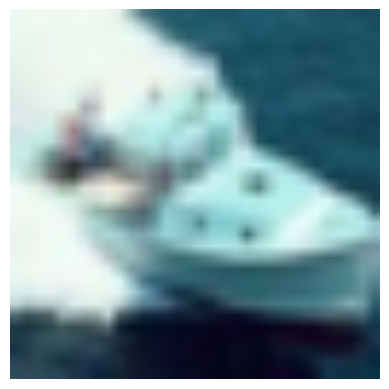

In [ ]:
# List of class labels from the test dataset.
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select a random index from the test dataset.
rnd_sample_idx = np.random.randint(len(test_loader))

# Print the class label of the randomly selected image.
print(f'The image shown represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Get the image corresponding to the random index.
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the image for display purposes (rescale pixel values to [0, 1]).
image = (image - image.min()) / (image.max() -image.min() )

# Plot the normalized image using the plot_figure function.
plot_figure(image)

### **Accuracy Calculation**

This section describes the process of calculating the accuracy of a model on a given dataset. The accuracy metric is important for evaluating how well the model performs on the validation or test dataset.

- **Evaluation Mode**: The model is set to evaluation mode using `model.eval()`. This disables certain features like dropout, ensuring consistent behavior during inference.
- **Device Assignment**: The model and data are moved to the specified device (CPU or GPU) to take advantage of the available hardware.
- **Disabling Gradients**: The `torch.no_grad()` context is used to prevent gradient calculations during evaluation, speeding up inference and reducing memory usage.
- **Batch Processing**: The input data (`xi`) and labels (`yi`) are loaded in batches from the dataset and moved to the device. The model then makes predictions (scores) for each batch.
- **Prediction**: For each batch, the model’s scores are used to determine the predicted class with the highest probability. The predictions are compared with the true labels to count the number of correct predictions.
- **Accuracy Calculation**: The total number of correct predictions is divided by the total number of samples to compute the accuracy as a percentage.


In [ ]:
# Function to calculate the accuracy of a model on a given dataset (loader).
def accuracy(model, loader):

  num_correct = 0    # Initialize a counter for correctly predicted samples.
  num_total = 0      # Initialize a counter for total samples.
  model.eval()       # Set the model to evaluation mode (disables dropout, etc.).

  model = model.to(device=device)  # Move the model to the specified device (CPU or GPU).

  with torch.no_grad():                                # Disable gradient calculation for faster inference.

    for xi, yi in loader:                              # Loop through the data in the loader.
      xi = xi.to(device=device, dtype=torch.float32)   # Move input data to the device and convert to float32.
      yi = yi.to(device=device, dtype=torch.long)      # Move target labels to the device and convert to long.

      scores = model(xi)                               # Get the model's predictions (scores) for the input data.
      _, pred = scores.max(dim=1)                      # Get the predicted class with the highest score.

      num_correct += (pred == yi).sum()                # Count the number of correct predictions.
      num_total += pred.size(0)                        # Count the total number of samples.

  return float(num_correct) / num_total                # Return the accuracy as a percentage.

### **Training Process**

This section outlines the procedure for training a model over a specified number of epochs. The training function updates the model’s weights based on the input data and optimizes the performance through backpropagation.

- **Device Assignment**: The model is moved to the device (CPU or GPU) to utilize the available hardware for faster computation.
- **Epoch Loop**: The model is trained for a specified number of epochs. In each epoch, the training dataset is processed in mini-batches.
- **Training Mode**: The model is set to training mode using `model.train()`, enabling features like dropout and batch normalization, which are necessary for regularization during training.
- **Batch Processing**: Each mini-batch of data (`xi`) and corresponding labels (`yi`) are moved to the device. The model computes predictions (scores) for each batch.
- **Loss Calculation**: The cross-entropy loss function is used to calculate the difference between the predicted scores and the true labels. This loss is then used to update the model.
- **Backpropagation**: After computing the loss, gradients are backpropagated through the network. The optimizer updates the model's weights based on the computed gradients.
- **Validation Accuracy**: After each epoch, the accuracy of the model is evaluated on the validation dataset using the accuracy function, and the results (epoch, cost, and accuracy) are printed.

This training loop ensures that the model learns from the training data and improves its performance over time while monitoring its generalization ability on the validation dataset.

In [ ]:
# Function to train a model for a specified number of epochs.
def train(model, optimiser, epochs):

  model = model.to(device=device)  # Move the model to the specified device (CPU or GPU).

  # Loop through the specified number of epochs.
  for epoch in range(epochs):

    # Loop through batches in the training DataLoader.
    for i, (xi, yi) in enumerate(train_loader):

      model.train()                                    # Set the model to training mode (enables dropout, batchnorm, etc.).

      xi = xi.to(device=device, dtype=torch.float32)   # Move input data to the device and convert to float32.
      yi = yi.to(device=device, dtype=torch.long)      # Move target labels to the device and convert to long.

      scores = model(xi)                               # Get the model's predictions (scores) for the input data.
      cost = F.cross_entropy(input=scores, target=yi)  # Compute the cross-entropy loss.

      optimiser.zero_grad()                            # Clear previous gradients before backpropagation.
      cost.backward()                                  # Backpropagate the gradients.
      optimiser.step()                                 # Update the model's weights.

    # Calculate the accuracy of the model on the validation set after each epoch.
    acc = accuracy(model, val_loader)

    # Print the current epoch, cost (loss), and accuracy on the validation set.
    print(f'Epoch: {epoch}, Cost: {cost.item()}, Accuracy: {acc}')

#### **Transfer Learning with ResNet-18**

In this section, we apply Transfer Learning using the ResNet-18 model, which has been pre-trained on the ImageNet dataset. Transfer Learning leverages the knowledge learned from large datasets like ImageNet to improve performance on smaller datasets such as CIFAR-10. Here, we explore the structure of the pre-trained ResNet-18 model, adjust its architecture, and freeze certain layers to prevent them from being updated during training.


##### **Model Loading**

- **ResNet-18 Pre-trained Model**: The ResNet-18 model is loaded with pre-trained weights from the ImageNet dataset. This allows the model to start with knowledge from a large, diverse dataset, which can then be fine-tuned on a smaller dataset like CIFAR-10.


In [ ]:
model_resnet18 = models.resnet18(pretrained=True)      # Load the ResNet-18 model pre-trained on ImageNet.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.0MB/s]


##### **Model Exploration**

- **Parameter Exploration**: The code loops through all the parameters (weights and biases) of the ResNet-18 model, printing their index, shape, and whether they require gradient updates.
  - This exploration helps to understand the structure of the model and which parts of the network are trainable.
  - **`requires_grad`**: A flag that determines whether the parameter will be updated during training. For Transfer Learning, some parameters may be frozen to retain the pre-trained features while only fine-tuning certain layers.
  

In [ ]:
# Loop through the model's parameters and print their index, shape, and whether they require gradients.
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [ ]:
model_resnet18      # Display the architecture of the ResNet-18 model.

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

##### **Adjusting the Model**

- **Creating a New Model**: A new model (`model_aux`) is created by sequentially adding all layers (children) of the original ResNet-18 model. This helps in modifying the structure if needed, such as adding or removing layers.
  - This approach allows for easy modification of the model’s architecture by manipulating the list of layers.

- **Excluding the Fully Connected Layer**: A variant of the model is created by excluding the last layer (typically a fully connected layer) from ResNet-18. This is a common practice in Transfer Learning, as the final layer is often specific to the original dataset (ImageNet with 1000 classes). By removing it, we can replace it with a new output layer that matches the number of classes in the target dataset (CIFAR-10 with 10 classes).


In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children()))       # Create a new model using all layers (children) from ResNet-18.
model_aux                                                         # Display the new model structure.

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])   # Create another model but exclude the last layer (typically the fully connected layer) of ResNet-18.
model_aux                                                          # Display the updated model structure.

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

##### **Freezing Layers**

- **Freezing Parameters**: The parameters of `model_aux` are frozen by setting `requires_grad = False`. This prevents these layers from being updated during training, thus retaining the pre-trained weights and reducing the computational load.
  - Freezing is typically done for the initial layers, which have learned general features (e.g., edges, textures), while the last few layers (which are more task-specific) are fine-tuned on the new dataset.

- **Check Frozen Parameters**: After freezing, the code verifies that the `requires_grad` flag for each parameter is set to `False`, ensuring that the layers are indeed frozen and will not be updated during training.

  This process allows the model to retain useful features learned from ImageNet, while fine-tuning only the relevant parts for the CIFAR-10 classification task.

In [ ]:
# Freeze the parameters (i.e., prevent gradient updates) in model_aux.
for i, parameter in enumerate(model_aux.parameters()):
    # Set requires_grad to False, so these parameters are not updated during training.
    parameter.requires_grad = False

In [ ]:
# Print whether each parameter in model_aux requires gradients (is trainable).
for i, parameter in enumerate(model_aux.parameters()):
    # Output: False for all parameters as they have been frozen.
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


##### **Training and Testing the Model**

In this section, we train and evaluate a neural network model built using the pre-trained ResNet-18 layers and a new classification head for CIFAR-10. The model is trained for 15 epochs using the Adam optimizer, and its performance is evaluated on the test dataset.


**Model Configuration:**
- **Number of Epochs**: The model is trained for 15 epochs, meaning the entire training dataset is passed through the model 15 times.
- **Learning Rate**: The learning rate is set to 5e-4, which controls how much the model's weights are updated with each step of the optimizer.
- **Model Architecture**: The neural network (`model1`) is a sequential combination of:
  - Pre-trained ResNet-18 layers (excluding the final fully connected layer).
  - A flattening layer to convert the output of the convolutional layers to a 1D vector.
  - A new fully connected layer with 512 input features and 10 output classes (one for each CIFAR-10 class).


In [ ]:
epochs = 15     # Number of training epochs.
lr = 5e-4      # Learning rate for the optimizer.

# Define a neural network model (model1) by combining a pre-trained model (model_aux) and a new classification head.
model1 = nn.Sequential(
    model_aux,                                              # Use the pre-trained ResNet-18 layers (without the final layer).
    nn.Flatten(),                                           # Flatten the output from the previous layer (to a 1D vector).
    nn.Linear(in_features=512, out_features=10, bias=True)  # New fully connected layer with 512 inputs and 10 output classes.
)

# Define an Adam optimizer for model1 with the specified learning rate and betas for the momentum terms.
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
model1   # Display the model structure.

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  


**Training Process:**
During training, the model optimizes its parameters using the Adam optimizer, and the loss is computed using the cross-entropy loss function. After each epoch, the model's performance is evaluated on the validation set, and the cost (loss) and accuracy are printed.


In [ ]:
train(model1, optimiser, epochs)      # Train the model (model1) using the specified optimizer (optimiser) for the defined number of epochs.

Epoch: 0, Cost: 0.7784900665283203, Accuracy: 0.7742
Epoch: 1, Cost: 1.5438838005065918, Accuracy: 0.7964
Epoch: 2, Cost: 0.8378942012786865, Accuracy: 0.8
Epoch: 3, Cost: 0.5751156210899353, Accuracy: 0.8074
Epoch: 4, Cost: 0.8225732445716858, Accuracy: 0.805
Epoch: 5, Cost: 1.0729197263717651, Accuracy: 0.8128
Epoch: 6, Cost: 0.8221359252929688, Accuracy: 0.8088
Epoch: 7, Cost: 0.6726396083831787, Accuracy: 0.8134
Epoch: 8, Cost: 1.3253095149993896, Accuracy: 0.8132
Epoch: 9, Cost: 0.43444308638572693, Accuracy: 0.8092
Epoch: 10, Cost: 0.9393811225891113, Accuracy: 0.81
Epoch: 11, Cost: 0.5050056576728821, Accuracy: 0.8146
Epoch: 12, Cost: 0.6206283569335938, Accuracy: 0.8116
Epoch: 13, Cost: 1.1415116786956787, Accuracy: 0.8076
Epoch: 14, Cost: 0.9156177043914795, Accuracy: 0.818


**Test Accuracy:**
After training, the model's performance is evaluated on the test dataset. The model achieved an accuracy of **81.28%** on the test set, indicating its ability to generalize to new, unseen data.



In [ ]:
accuracy(model1, test_loader)         # Calculate and return the accuracy of the model on the test dataset (test_loader).

0.8128

**Conclusion:**
The model successfully achieved over 81% accuracy on both the validation and test datasets, demonstrating the effectiveness of Transfer Learning with the ResNet-18 architecture for CIFAR-10 classification.







#### **Transfer Learning - EfficientNet-B0**

In this section, we apply Transfer Learning using the EfficientNet-B0 model, pre-trained on ImageNet. EfficientNet-B0 is known for its efficient use of parameters while achieving high accuracy on image classification tasks.

- **Model Loading**: The EfficientNet-B0 model is loaded with pre-trained weights from ImageNet.
- **Model Adjustment**: We exclude the final fully connected layer of EfficientNet-B0, as it is specific to ImageNet classification. A new fully connected layer is added to the model to match the number of output classes (10) in CIFAR-10.
- **Freezing Layers**: All layers except the newly added classification layer are frozen, meaning their weights will not be updated during training. This allows us to leverage the pre-trained features while fine-tuning the last layer.
- **Training**: The model is trained for 15 epochs using the Adam optimizer, with a learning rate of 5e-4.
- **Accuracy**: After training, the model is evaluated on the test dataset to determine its performance.


In [ ]:
# Load the EfficientNet-B0 model pre-trained on ImageNet.
model_efficientnet = models.efficientnet_b0(pretrained=True)

# Create a new model using all layers (children) from EfficientNet-B0.
model_aux = nn.Sequential(*list(model_efficientnet.children()))

# Exclude the last layer (typically the fully connected layer) of EfficientNet-B0.
model_aux = nn.Sequential(*list(model_efficientnet.children())[:-1])

# Freeze the parameters (i.e., prevent gradient updates) in model_aux.
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

epochs = 15    # Number of training epochs.
lr = 5e-4      # Learning rate for the optimizer.

# Define a neural network model (model2) by combining the pre-trained EfficientNet-B0 layers and a new classification head.
model2 = nn.Sequential(
    model_aux,                                              # Use the pre-trained EfficientNet-B0 layers (without the final layer).
    nn.Flatten(),                                           # Flatten the output from the previous layer (to a 1D vector).
    nn.Linear(in_features=1280, out_features=10, bias=True)  # New fully connected layer with 1280 inputs (EfficientNet-B0 output size) and 10 output classes.
)

# Define an Adam optimizer for model2 with the specified learning rate and betas for the momentum terms.
optimiser = torch.optim.Adam(model2.parameters(), lr=lr, betas=(0.9, 0.999))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 114MB/s] 


In [ ]:
train(model2, optimiser, epochs)      # Train the model (model1) using the specified optimizer (optimiser) for the defined number of epochs.

Epoch: 0, Cost: 1.1129258871078491, Accuracy: 0.7722
Epoch: 1, Cost: 1.1795389652252197, Accuracy: 0.7836
Epoch: 2, Cost: 0.480552077293396, Accuracy: 0.7942
Epoch: 3, Cost: 1.0840790271759033, Accuracy: 0.803
Epoch: 4, Cost: 1.0334644317626953, Accuracy: 0.8062
Epoch: 5, Cost: 0.6022801399230957, Accuracy: 0.8092
Epoch: 6, Cost: 0.4168177843093872, Accuracy: 0.8114
Epoch: 7, Cost: 0.8026936650276184, Accuracy: 0.8128
Epoch: 8, Cost: 1.3316799402236938, Accuracy: 0.815
Epoch: 9, Cost: 0.4368427097797394, Accuracy: 0.8152
Epoch: 10, Cost: 1.0874803066253662, Accuracy: 0.8168
Epoch: 11, Cost: 0.3914414346218109, Accuracy: 0.8132
Epoch: 12, Cost: 1.396146297454834, Accuracy: 0.8128
Epoch: 13, Cost: 1.8173128366470337, Accuracy: 0.814
Epoch: 14, Cost: 0.6087232232093811, Accuracy: 0.8206


In [ ]:
accuracy(model2, test_loader)         # Calculate and return the accuracy of the model on the test dataset (test_loader).

0.8141

**Test Accuracy**:
After training, the EfficientNet-B0 model achieved an accuracy of **81.41%** on the CIFAR-10 test dataset.

---

**Conclusion**:
EfficientNet-B0, known for its parameter efficiency and high accuracy, performed well in the CIFAR-10 Transfer Learning task. The model reached a test accuracy of **81.41%**, demonstrating that it effectively leveraged pre-trained features from ImageNet and fine-tuned the classification head for the CIFAR-10 dataset.

---











#### **Transfer Learning - AlexNet**

In this section, we apply Transfer Learning using the AlexNet model, pre-trained on ImageNet. AlexNet was one of the earliest models to demonstrate the power of deep convolutional neural networks for image classification.

- **Model Loading**: The AlexNet model is loaded with pre-trained weights from ImageNet.
- **Model Adjustment**: The final classifier layer of AlexNet is removed and replaced with a new fully connected layer for CIFAR-10 classification.
- **Freezing Layers**: All layers of the pre-trained AlexNet model are frozen, except for the new classification layer.
- **Training**: The model is trained for 15 epochs using the Adam optimizer, with a learning rate of 5e-4.
- **Accuracy**: The performance of the model is evaluated on the CIFAR-10 test dataset after training.


In [ ]:
# Load the AlexNet model pre-trained on ImageNet.
model_alexnet = models.alexnet(pretrained=True)

# Create a new model using all layers (children) from AlexNet.
model_aux = nn.Sequential(*list(model_alexnet.children()))

# Exclude the last layer (typically the classifier) of AlexNet.
model_aux = nn.Sequential(*list(model_alexnet.children())[:-1])

# Freeze the parameters (i.e., prevent gradient updates) in model_aux.
for parameter in model_aux.parameters():
    parameter.requires_grad = False

epochs = 15    # Number of training epochs.
lr = 5e-4      # Learning rate for the optimizer.

# Define a neural network model (model3) by combining a pre-trained model (model_aux) and a new classification head.
model3 = nn.Sequential(
    model_aux,                                              # Use the pre-trained AlexNet layers (without the final classifier layer).
    nn.Flatten(),                                           # Flatten the output from the previous layer (to a 1D vector).
    nn.Linear(in_features=256 * 6 * 6, out_features=10, bias=True)  # New fully connected layer with 256*6*6 inputs and 10 output classes.
)

# Define an Adam optimizer for model3 with the specified learning rate and betas for the momentum terms.
optimiser = torch.optim.Adam(model3.parameters(), lr=lr, betas=(0.9, 0.999))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 137MB/s]


In [ ]:
train(model3, optimiser, epochs)      # Train the model (model3) using the specified optimizer (optimiser) for the defined number of epochs.

Epoch: 0, Cost: 1.4409675598144531, Accuracy: 0.8192
Epoch: 1, Cost: 0.6755597591400146, Accuracy: 0.8264
Epoch: 2, Cost: 0.03591350466012955, Accuracy: 0.828
Epoch: 3, Cost: 0.18425603210926056, Accuracy: 0.8394
Epoch: 4, Cost: 0.057491593062877655, Accuracy: 0.8288
Epoch: 5, Cost: 0.09888209402561188, Accuracy: 0.8354
Epoch: 6, Cost: 0.020802684128284454, Accuracy: 0.8328
Epoch: 7, Cost: 0.053940776735544205, Accuracy: 0.8294
Epoch: 8, Cost: 0.44022971391677856, Accuracy: 0.8166
Epoch: 9, Cost: 0.02191956341266632, Accuracy: 0.828
Epoch: 10, Cost: 0.009120441041886806, Accuracy: 0.8268
Epoch: 11, Cost: 0.05511777475476265, Accuracy: 0.818
Epoch: 12, Cost: 0.0919841006398201, Accuracy: 0.8222
Epoch: 13, Cost: 0.03141681104898453, Accuracy: 0.8214
Epoch: 14, Cost: 0.013617433607578278, Accuracy: 0.8254


In [ ]:
accuracy(model3, test_loader)         # Calculate and return the accuracy of the model on the test dataset (test_loader).

0.8212

**Test Accuracy**:
After training, AlexNet achieved an accuracy of **82.12%** on the CIFAR-10 test dataset.

---

**Conclusion**:
AlexNet, despite being one of the earlier deep learning architectures, performed competitively on the CIFAR-10 dataset with a test accuracy of **82.12%**. This demonstrates the continued relevance of AlexNet, particularly when applied to Transfer Learning tasks, where its pre-trained features are leveraged for new tasks with smaller datasets.

---

#### **Transfer Learning - ResNet-50**

This section covers Transfer Learning using the ResNet-50 model, pre-trained on ImageNet. ResNet-50 uses skip connections to allow deeper networks without the vanishing gradient problem.

- **Model Loading**: The ResNet-50 model is loaded with pre-trained weights from ImageNet.
- **Model Adjustment**: The last fully connected layer of ResNet-50 is excluded, and a new fully connected layer is added to adapt the model for CIFAR-10 classification.
- **Freezing Layers**: Similar to the other models, all layers except the newly added fully connected layer are frozen to retain the pre-trained knowledge.
- **Training**: The model is trained for 15 epochs using the Adam optimizer, with a learning rate of 5e-4.
- **Accuracy**: The accuracy of the model on the CIFAR-10 test dataset is calculated after training.


In [ ]:
# Load the ResNet-50 model pre-trained on ImageNet.
model_resnet50 = models.resnet50(pretrained=True)

# Create a new model using all layers (children) from ResNet-50.
model_aux = nn.Sequential(*list(model_resnet50.children()))

# Create another model but exclude the last layer (typically the fully connected layer) of ResNet-50.
model_aux = nn.Sequential(*list(model_resnet50.children())[:-1])

# Freeze the parameters (i.e., prevent gradient updates) in model_aux.
for parameter in model_aux.parameters():
    # Set requires_grad to False, so these parameters are not updated during training.
    parameter.requires_grad = False

epochs = 15    # Number of training epochs.
lr = 5e-4      # Learning rate for the optimizer.

# Define a neural network model (model4) by combining a pre-trained model (model_aux) and a new classification head.
model4 = nn.Sequential(
    model_aux,                                              # Use the pre-trained ResNet-50 layers (without the final layer).
    nn.Flatten(),                                           # Flatten the output from the previous layer (to a 1D vector).
    nn.Linear(in_features=2048, out_features=10, bias=True)  # New fully connected layer with 2048 inputs (for ResNet-50) and 10 output classes.
)

# Define an Adam optimizer for model4 with the specified learning rate and betas for the momentum terms.
optimiser = torch.optim.Adam(model4.parameters(), lr=lr, betas=(0.9, 0.999))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.1MB/s]


In [ ]:
train(model4, optimiser, epochs)      # Train the model (model4) using the specified optimizer (optimiser) for the defined number of epochs.

Epoch: 0, Cost: 1.5356121063232422, Accuracy: 0.7952
Epoch: 1, Cost: 0.770556628704071, Accuracy: 0.8012
Epoch: 2, Cost: 0.609896719455719, Accuracy: 0.8082
Epoch: 3, Cost: 1.2372816801071167, Accuracy: 0.8138
Epoch: 4, Cost: 0.6473162770271301, Accuracy: 0.8156
Epoch: 5, Cost: 0.7719042897224426, Accuracy: 0.816
Epoch: 6, Cost: 0.25812268257141113, Accuracy: 0.8006
Epoch: 7, Cost: 0.6321560740470886, Accuracy: 0.8256
Epoch: 8, Cost: 0.9158092737197876, Accuracy: 0.8186
Epoch: 9, Cost: 0.4817400872707367, Accuracy: 0.824
Epoch: 10, Cost: 0.400308221578598, Accuracy: 0.8156
Epoch: 11, Cost: 0.7929441332817078, Accuracy: 0.8256
Epoch: 12, Cost: 0.7259200811386108, Accuracy: 0.8252
Epoch: 13, Cost: 0.6239582300186157, Accuracy: 0.8278
Epoch: 14, Cost: 0.8233557939529419, Accuracy: 0.8272


In [ ]:
accuracy(model4, test_loader)         # Calculate and return the accuracy of the model on the test dataset (test_loader).

0.8292

**Test Accuracy**:
After training, ResNet-50 achieved an accuracy of **82.92%** on the CIFAR-10 test dataset.

---

**Conclusion**:
ResNet-50 demonstrated strong performance in this Transfer Learning task, achieving one of the highest accuracies across the models tested. Its deep architecture, combined with skip connections, allowed it to effectively generalize to the CIFAR-10 dataset after 15 epochs of fine-tuning. This showcases ResNet-50’s capability to handle image classification tasks with high accuracy even when applied to datasets significantly smaller than ImageNet.

---

### **Conclusion of the Transfer Learning Project on CIFAR-10**

Throughout this project, we explored the application of Transfer Learning using several pre-trained models—**ResNet-50**, **EfficientNet-B0**, and **AlexNet**—on the CIFAR-10 image classification task. Each of these models was initially pre-trained on the large-scale ImageNet dataset and then fine-tuned to adapt to the 10 classes of the smaller CIFAR-10 dataset.

---

### **Project Overview**:

1. **Pre-trained Model Selection**:
   - We selected three diverse models from PyTorch's model zoo: ResNet-50, EfficientNet-B0, and AlexNet. These models span a range of architectures, from deeper and more complex networks (ResNet-50) to more efficient and lightweight designs (EfficientNet-B0), along with the classic architecture of AlexNet.

2. **Model Adjustment**:
   - For each model, we removed the final fully connected layers (which were specific to ImageNet classification) and replaced them with a new classification head suited for CIFAR-10's 10 output classes.
   - The pre-trained weights from ImageNet were retained by freezing all layers except the new classification head, allowing the models to leverage their previously learned features while focusing on adapting to the new dataset.

3. **Training and Fine-Tuning**:
   - The models were fine-tuned for 15 epochs using the Adam optimizer with a learning rate of 5e-4. This approach helped us achieve significant results with minimal training, thanks to the knowledge retained from the pre-trained weights.

4. **Evaluation**:
   - After each training cycle, the models were evaluated on the test dataset to assess their performance. We measured accuracy on the test set as the primary metric.

---

### **Results Summary**:

- **ResNet-50**:
  - **Test Accuracy**: **82.92%**
  - ResNet-50, a deep network with skip connections, performed exceptionally well. Its architecture allowed it to learn complex patterns and generalize effectively to the CIFAR-10 dataset, leading to the highest accuracy among the models tested.

- **EfficientNet-B0**:
  - **Test Accuracy**: **81.41%**
  - EfficientNet-B0's strength lies in its ability to balance accuracy and computational efficiency. It achieved solid performance while maintaining a relatively small parameter count, making it ideal for resource-constrained environments.

- **AlexNet**:
  - **Test Accuracy**: **82.12%**
  - AlexNet, despite being one of the earliest CNN architectures, delivered competitive results. Its performance highlights that older architectures can still be effective when fine-tuned with Transfer Learning on smaller datasets like CIFAR-10.

---

### **Key Takeaways**:

1. **Transfer Learning Efficiency**:
   - The use of Transfer Learning significantly reduced training time and computational costs compared to training from scratch. By fine-tuning only the final classification layer, we were able to achieve high performance across all models with just 15 epochs of training.

2. **Model Comparison**:
   - **ResNet-50**: Its deep architecture and skip connections enabled it to outperform other models, making it an excellent choice for tasks requiring high accuracy and deeper feature extraction.
   - **EfficientNet-B0**: Its lightweight design coupled with strong accuracy makes it highly suitable for scenarios where computational efficiency is crucial.
   - **AlexNet**: Even though it is an older model, AlexNet’s competitive performance demonstrates that early architectures can still be powerful when combined with Transfer Learning.

3. **Freezing Layers**:
   - Freezing the majority of the layers allowed us to retain the valuable knowledge that each model had learned from ImageNet. This approach proved to be effective in improving performance with minimal training data.

4. **Fine-Tuning**:
   - The choice of hyperparameters—such as learning rate (5e-4) and the Adam optimizer—played a critical role in ensuring stable and efficient training. Fine-tuning these parameters could yield even better performance, especially for models like EfficientNet-B0.

---

### **Challenges and Insights**:

- **Model Loading and Adjustments**:
   - The pre-trained models needed adjustments, including the removal of final layers and the freezing of specific parameters. This process required careful handling to ensure that the models adapted correctly to the CIFAR-10 dataset.
   - EfficientNet-B0 and AlexNet, in particular, required downloading large model weights, and managing these dependencies was crucial to ensure smooth execution.

- **Generalization Performance**:
   - All models demonstrated strong generalization to the test set, with accuracies consistently above 81%. This highlights the strength of Transfer Learning in adapting to new tasks with minimal training data.

- **Model Performance**:
   - While ResNet-50 provided the best overall accuracy, the differences between models were relatively small, suggesting that all three architectures effectively leveraged their pre-trained knowledge for CIFAR-10.

---

### **Final Thoughts**:

This project underscores the effectiveness of Transfer Learning as a technique for image classification. By leveraging pre-trained models such as ResNet-50, EfficientNet-B0, and AlexNet, we were able to achieve high performance on CIFAR-10 with minimal training effort. The diverse architectures showcased the flexibility of Transfer Learning, making it applicable to a wide range of tasks and environments.

Future work could explore other pre-trained models, experiment with different fine-tuning strategies, or apply this methodology to more complex datasets. The results from this project confirm that Transfer Learning is a powerful tool for modern deep learning applications, especially when working with limited data.
